In [21]:
library(dplyr)
library(ggplot2)
library(vcd)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid


Attaching package: ‘vcd’


The following object is masked _by_ ‘.GlobalEnv’:

    odds




In [22]:
# Считаем данные
titanic <- read.csv("https://stepic.org/media/attachments/course/524/train.csv")
titanic <- na.omit(titanic)
glimpse(titanic) #как str только лучше

# Оставляем только столбцы Survived, Pclass, Sex
titanic <- select(titanic, Survived, Pclass, Sex)
# mutate - это функция, которая добавляет новые столбцы или изменяет существующие в датафрейме.
titanic <- mutate(titanic, 
                  Survived = factor(Survived, labels = c("No", "Yes")), # в фактор
                  Pclass = factor(Pclass, labels = c("First", "Second", "Third")), 
                  Sex = factor(Sex, labels = c("Female", "Male")))

glimpse(titanic) #как str только лучше




Rows: 714
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19…
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1…
$ Pclass      <int> 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 2, 2, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "mal…
$ Age         <dbl> 22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, …
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 51.8625, 21.0750…
$ Cabin       <chr> "", "C85", "", "C123", "", "E46", "", "", "", "G6", "C103"…
$ Embarked    <chr> "S", "C", "S", "S", "S", "S", "S", "S", "C", "S", "S", "S"…
Rows: 714
Columns:

In [23]:
table(titanic)


, , Sex = Female

        Pclass
Survived First Second Third
     No      3      6    55
     Yes    82     68    47

, , Sex = Male

        Pclass
Survived First Second Third
     No     61     84   215
     Yes    40     15    38


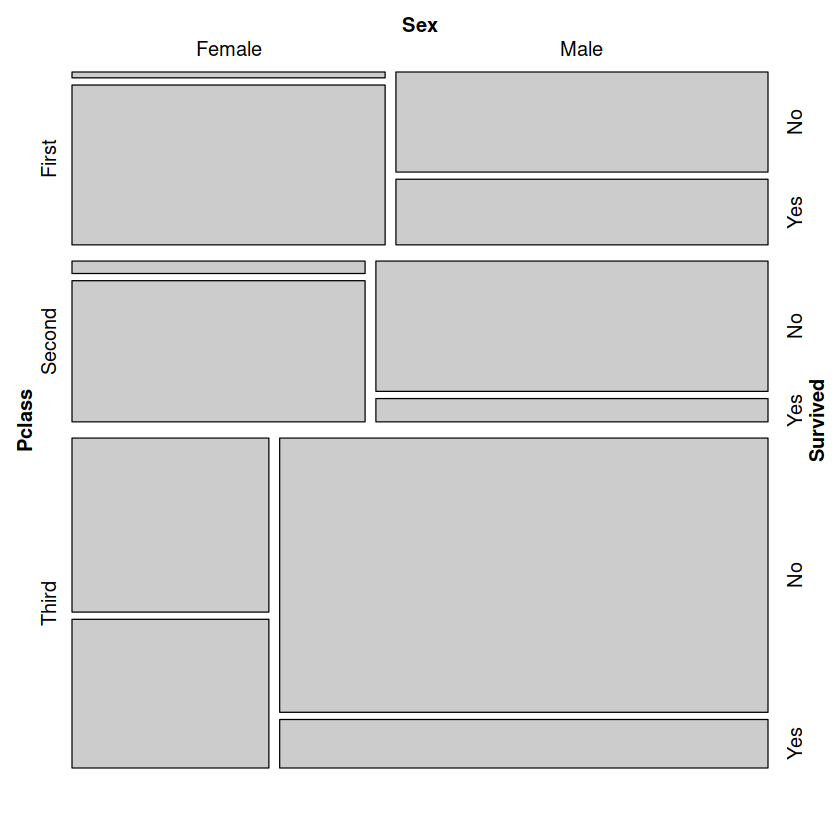

In [24]:
# Построим мозаичный график
mosaic(~ Sex + Survived | Pclass, data=titanic) 


## Модель без предикторов (Intercept only model)

In [25]:
# Модель без предикторов (Intercept only model)
simple_fit <- glm(Survived ~ 1, titanic, family = "binomial")

coef(simple_fit) # коэф-ы модели
table(titanic$Survived)


odds <- 290 / 424
log(odds) 

summary(simple_fit)




(Intercept) 
 -0.3798525


 No Yes 
424 290 

[1] -0.3798525


Call:
glm(formula = Survived ~ 1, family = "binomial", data = titanic)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.3799     0.0762  -4.985  6.2e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 964.52  on 713  degrees of freedom
AIC: 966.52

Number of Fisher Scoring iterations: 4


## Модель с одним номинативным предиктором


In [26]:
# Модель с одним номинативным предиктором
fit1 <- glm(Survived ~ Sex, titanic, family = "binomial")
coef(fit1)
table(titanic$Survived, titanic$Sex)

odds_male <- 93 / 360
odds_female <- 197 / 64

log(odds_female)
log(odds_male)

odds_ratio <- odds_male / odds_female
log(odds_ratio)

summary(fit1)

(Intercept)     SexMale 
   1.124321   -2.477825

     
      Female Male
  No      64  360
  Yes    197   93

[1] 1.124321

[1] -1.353505

[1] -2.477825


Call:
glm(formula = Survived ~ Sex, family = "binomial", data = titanic)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.1243     0.1439   7.814 5.52e-15 ***
SexMale      -2.4778     0.1850 -13.392  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 750.70  on 712  degrees of freedom
AIC: 754.7

Number of Fisher Scoring iterations: 4


### Сравнение моделей

In [27]:
anova(simple_fit, fit1, test="Chisq")
anova(fit1, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,713,964.5160,NA,NA,NA
2,712,750.7002,1,213.8158,2.020274e-48


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,713,964.5160,NA
Sex,1,213.8158,712,750.7002,2.020274e-48


## Модель с двумя категориальными предикторами


In [28]:
# Модель с двумя категориальными предикторами
fit2 <- glm(Survived ~ Sex * Pclass, titanic, family = "binomial")
coef(fit2)
summary(fit2)

table(titanic$Survived, titanic$Pclass , titanic$Sex)


(Intercept)              SexMale         PclassSecond 
           3.3081063           -3.7301007           -0.8803580 
         PclassThird SexMale:PclassSecond  SexMale:PclassThird 
          -3.4652918           -0.4204142            2.1542344


Call:
glm(formula = Survived ~ Sex * Pclass, family = "binomial", data = titanic)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)            3.3081     0.5875   5.631 1.79e-08 ***
SexMale               -3.7301     0.6217  -6.000 1.98e-09 ***
PclassSecond          -0.8804     0.7256  -1.213  0.22503    
PclassThird           -3.4653     0.6202  -5.588 2.30e-08 ***
SexMale:PclassSecond  -0.4204     0.8040  -0.523  0.60106    
SexMale:PclassThird    2.1542     0.6760   3.187  0.00144 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 642.28  on 708  degrees of freedom
AIC: 654.28

Number of Fisher Scoring iterations: 5


, ,  = Female

     
      First Second Third
  No      3      6    55
  Yes    82     68    47

, ,  = Male

     
      First Second Third
  No     61     84   215
  Yes    40     15    38


In [29]:

# (Intercept) 
female_p1_odds <- 82 / 3
log(female_p1_odds)

# Sexmale  
male_p1_odds <- 40  /  61 
log(male_p1_odds)
log(male_p1_odds / female_p1_odds )

# PclassSecond
female_p2_odds <- 68  /  6 
log(female_p2_odds / female_p1_odds )

# PclassThird
female_p3_odds <- 47  /  55 
log(female_p3_odds / female_p1_odds )

# SexMale:PclassSecond
male_p2_odds <- 15 / 84
log(male_p2_odds / female_p2_odds ) - log(male_p1_odds / female_p1_odds )

#Sexmale:factorThird 
male_p3_odds <- 38 / 215
log(male_p3_odds / female_p3_odds ) - log(male_p1_odds / female_p1_odds )


[1] 3.308107

[1] -0.4219944

[1] -3.730101

[1] -0.8803587

[1] -3.465293

[1] -0.4204135

[1] 2.154235

### сравнение моделей

In [30]:

# сравнение моделей
fit1 <- glm(Survived ~ Sex, titanic, family = "binomial")
fit2 <- glm(Survived ~ Sex * Pclass, titanic, family = "binomial")

anova(fit1, fit2, test="Chisq")
anova(fit2, test="Chisq")
# предсказание новых данных
new_data <- data.frame(Sex = "Female", Pclass = "First")
predict(fit2, newdata = new_data, type = "response")


fit3 <- glm(Survived ~ Sex + Pclass, titanic, family = "binomial")
predict(fit3, newdata = new_data)

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,712,750.7002,NA,NA,NA
2,708,642.2750,4,108.4252,1.576933e-22


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,713,964.5160,NA
Sex,1,213.81576,712,750.7002,2.020274e-48
Pclass,2,78.26950,710,672.4307,1.009241e-17
Sex:Pclass,2,30.15567,708,642.2750,2.829962e-07


1 
0.9647059

1 
2.333819

In [31]:
odds = function(p){
    odds = p / (1 - p)
}

In [32]:
t = odds(0.1)
t

[1] 0.1111111

In [33]:
-1.15+0.8+2.13-0.17
exp(-1.15+0.8+2.13-0.17)
exp(-1.15+0.8+2.13-0.17)/(1+exp(-1.15+0.8+2.13-0.17))


[1] 1.61

[1] 5.002811

[1] 0.8334114